# 4. 셀프 주요소는 정말 저렴할까

- Selenum을 활용하여 

## 1) 주소 접근

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# 드라이버 로드 및 네이버 주소에 드라이버 
# 웹크롤링용 드라이버 설치
driver = webdriver.Chrome(ChromeDriverManager().install())
# 주소 불러오기
driver.get("http://www.opinet.co.kr/searRgSelect.do")
driver.get("http://www.opinet.co.kr/searRgSelect.do")



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST driver version for 98.0.4758
Driver [C:\Users\심종수\.wdm\drivers\chromedriver\win32\98.0.4758.80\chromedriver.exe] found in cache


In [3]:
# 시군구 옵션 선택
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [4]:
# 구 이름 불러오기
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [31]:
# 시군구 옵션에서 중구 선택
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys('중구')
### 오류

In [21]:
# 클릭하면 원래 바뀌어야함 하지만 오류
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()
### 오류

In [ ]:
# 엑셀 저장 클릭
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()
### 오류

In [5]:
# 25개의 구에 대한 반복
import time
from tqdm import tqdm_notebook
from selenium.webdriver.common.keys import Keys 

### 오류로 인해 Keys의 ARROW_DOWN 활용
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    ## 아래 부분 선택
    element.send_keys(Keys.ARROW_DOWN)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    ## 최종적으로 엑셀 파일 다운
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    
    time.sleep(1)

<ipython-input-5-d14d0a991e1e>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


In [6]:
# 창 닫기
driver.close()

## 2) 파일 통합

In [7]:
import pandas as pd
from glob import glb

In [25]:
# glob를 통한 데이터 통합
glob('Chrome/*.xls')

['Chrome\\지역_위치별(주유소) (1).xls',
 'Chrome\\지역_위치별(주유소) (10).xls',
 'Chrome\\지역_위치별(주유소) (11).xls',
 'Chrome\\지역_위치별(주유소) (12).xls',
 'Chrome\\지역_위치별(주유소) (13).xls',
 'Chrome\\지역_위치별(주유소) (14).xls',
 'Chrome\\지역_위치별(주유소) (15).xls',
 'Chrome\\지역_위치별(주유소) (16).xls',
 'Chrome\\지역_위치별(주유소) (17).xls',
 'Chrome\\지역_위치별(주유소) (18).xls',
 'Chrome\\지역_위치별(주유소) (19).xls',
 'Chrome\\지역_위치별(주유소) (2).xls',
 'Chrome\\지역_위치별(주유소) (20).xls',
 'Chrome\\지역_위치별(주유소) (21).xls',
 'Chrome\\지역_위치별(주유소) (22).xls',
 'Chrome\\지역_위치별(주유소) (23).xls',
 'Chrome\\지역_위치별(주유소) (24).xls',
 'Chrome\\지역_위치별(주유소) (3).xls',
 'Chrome\\지역_위치별(주유소) (4).xls',
 'Chrome\\지역_위치별(주유소) (5).xls',
 'Chrome\\지역_위치별(주유소) (6).xls',
 'Chrome\\지역_위치별(주유소) (7).xls',
 'Chrome\\지역_위치별(주유소) (8).xls',
 'Chrome\\지역_위치별(주유소) (9).xls',
 'Chrome\\지역_위치별(주유소).xls']

In [26]:
stations_files = glob('Chrome/*.xls')
stations_files

['Chrome\\지역_위치별(주유소) (1).xls',
 'Chrome\\지역_위치별(주유소) (10).xls',
 'Chrome\\지역_위치별(주유소) (11).xls',
 'Chrome\\지역_위치별(주유소) (12).xls',
 'Chrome\\지역_위치별(주유소) (13).xls',
 'Chrome\\지역_위치별(주유소) (14).xls',
 'Chrome\\지역_위치별(주유소) (15).xls',
 'Chrome\\지역_위치별(주유소) (16).xls',
 'Chrome\\지역_위치별(주유소) (17).xls',
 'Chrome\\지역_위치별(주유소) (18).xls',
 'Chrome\\지역_위치별(주유소) (19).xls',
 'Chrome\\지역_위치별(주유소) (2).xls',
 'Chrome\\지역_위치별(주유소) (20).xls',
 'Chrome\\지역_위치별(주유소) (21).xls',
 'Chrome\\지역_위치별(주유소) (22).xls',
 'Chrome\\지역_위치별(주유소) (23).xls',
 'Chrome\\지역_위치별(주유소) (24).xls',
 'Chrome\\지역_위치별(주유소) (3).xls',
 'Chrome\\지역_위치별(주유소) (4).xls',
 'Chrome\\지역_위치별(주유소) (5).xls',
 'Chrome\\지역_위치별(주유소) (6).xls',
 'Chrome\\지역_위치별(주유소) (7).xls',
 'Chrome\\지역_위치별(주유소) (8).xls',
 'Chrome\\지역_위치별(주유소) (9).xls',
 'Chrome\\지역_위치별(주유소).xls']

In [27]:
# 파일 통합과정
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [28]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 36
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      471 non-null    object
 1   상호      471 non-null    object
 2   주소      471 non-null    object
 3   상표      471 non-null    object
 4   전화번호    471 non-null    object
 5   셀프여부    471 non-null    object
 6   고급휘발유   471 non-null    object
 7   휘발유     471 non-null    object
 8   경유      471 non-null    object
 9   실내등유    471 non-null    object
dtypes: object(10)
memory usage: 40.5+ KB


In [29]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1683,1513,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1713,1567,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1870,1738,1594,1280
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1755,1595,-
4,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1778,1618,-


In [30]:
# 데이터프레임 이름 변경
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1683,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1713,N,현대오일뱅크
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1738,N,GS칼텍스
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1755,Y,GS칼텍스
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1778,Y,S-OIL


In [31]:
# '구' 따로 출력

stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1683,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1713,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1738,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1755,Y,GS칼텍스,강동구
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1778,Y,S-OIL,강동구


In [32]:
# '구' 열 오류 확인
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [34]:
# 가격이 나타나지 않은 행 표시
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
34,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [35]:
# 해당 행 제거 후 데이터 셋 재구성
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1683,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1713,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1738,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1755,Y,GS칼텍스,강동구
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1778,Y,S-OIL,강동구


In [36]:
#  Float형으로 가격 변화
stations['가격'] = [float(value) for value in stations['가격']]

In [37]:
# index열 재구성
stations.reset_index(inplace=True)
del stations['index']

In [38]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  464 non-null    object 
 1   주소         464 non-null    object 
 2   가격         464 non-null    float64
 3   셀프         464 non-null    object 
 4   상표         464 non-null    object 
 5   구          464 non-null    object 
dtypes: float64(1), object(5)
memory usage: 21.9+ KB


In [39]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1683.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1713.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1738.0,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1755.0,Y,GS칼텍스,강동구
4,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1778.0,Y,S-OIL,강동구


## 3) 시각화

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

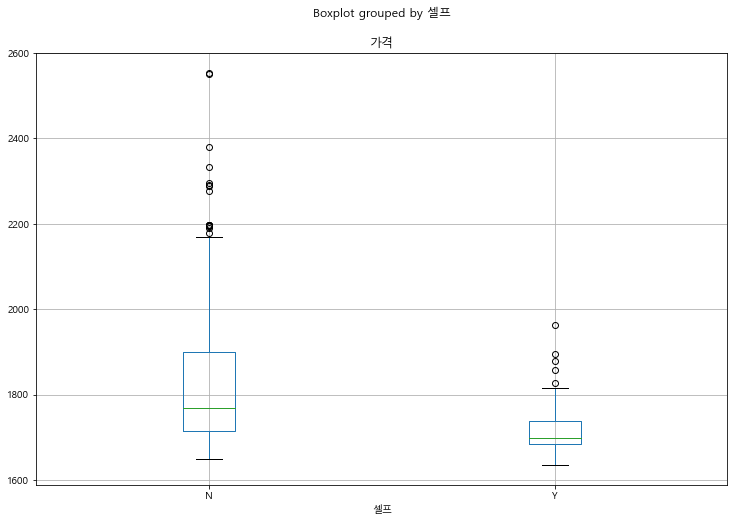

In [41]:
# 셀프 여부에 따른 가격 분포 확인
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

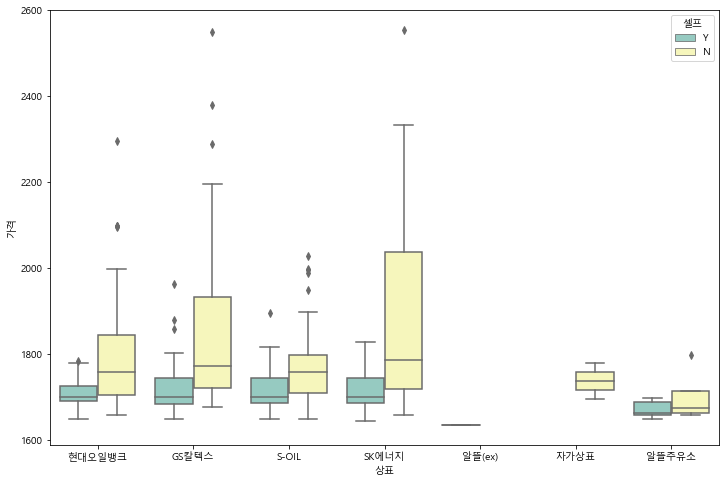

In [42]:
# 상표와 셀프 여부에 따른 가격 분포 확인
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

- 당연히 셀프 주요소가 조금 더 싼 가격 분포를 보인다.
- SK에너지가 분포상 더 비싸다고 판단할 수 있다.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


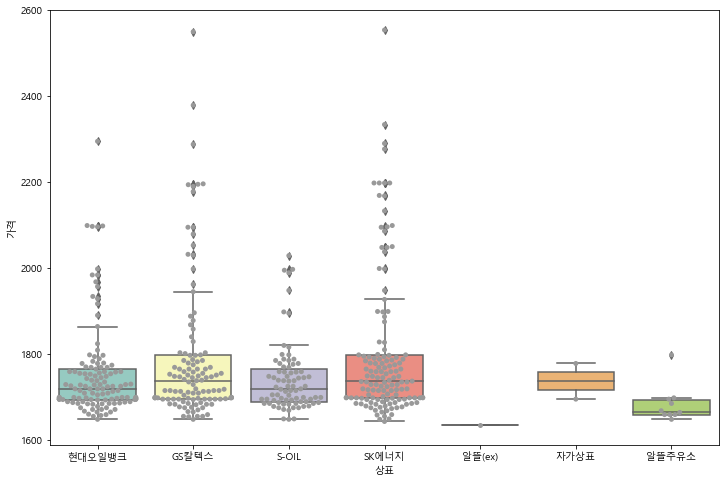

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
## swarmplot ****
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

## 4) 지도 시각화

In [46]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [47]:
# 가격 높은 10개 -> 모두 셀프 주유가 아니다
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
288,서남주유소,서울 중구 통일로 30,2554.0,N,SK에너지,중구
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2550.0,N,GS칼텍스,용산구
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2379.0,N,GS칼텍스,중구
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2334.0,N,SK에너지,중구
463,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
462,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구
250,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
251,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구


In [48]:
# 가격 낮은 10개 -> 대부분 셀프 주유이다.
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
70,만남의광장주유소,서울 서초구 양재대로12길 73-71,1634.0,Y,알뜰(ex),서초구
176,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1643.0,Y,SK에너지,양천구
201,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1648.0,Y,SK에너지,영등포구
202,도림주유소,서울 영등포구 도림로 343 (도림동),1648.0,Y,알뜰주유소,영등포구
203,성락주유소,서울 영등포구 가마산로 414 (신길동),1648.0,Y,S-OIL,영등포구
204,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1648.0,Y,GS칼텍스,영등포구
205,영등포제일셀프주유소,서울 영등포구 가마산로 379,1648.0,Y,현대오일뱅크,영등포구
55,문화사랑주유소,서울 서대문구 세검정로 87 (홍제동),1649.0,N,S-OIL,서대문구
177,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1649.0,Y,SK에너지,양천구
178,현대주유소,서울 양천구 남부순환로 372 (신월동),1649.0,Y,S-OIL,양천구


In [49]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1907.058824
강동구,1789.071429
강북구,1682.153846
강서구,1735.312500
관악구,1758.000000


In [50]:
# 가격 높은 10개 데이터셋 구성-> 모두 셀프 주유가 아니다
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
288,서남주유소,서울 중구 통일로 30,2554.0,N,SK에너지,중구
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2550.0,N,GS칼텍스,용산구
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2379.0,N,GS칼텍스,중구
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2334.0,N,SK에너지,중구
463,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
462,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구
250,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
251,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구


In [51]:
# 가격 낮은 10개 데이터셋 구성 -> 대부분 셀프 주유이다.
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
70,만남의광장주유소,서울 서초구 양재대로12길 73-71,1634.0,Y,알뜰(ex),서초구
176,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1643.0,Y,SK에너지,양천구
201,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1648.0,Y,SK에너지,영등포구
202,도림주유소,서울 영등포구 도림로 343 (도림동),1648.0,Y,알뜰주유소,영등포구
203,성락주유소,서울 영등포구 가마산로 414 (신길동),1648.0,Y,S-OIL,영등포구
204,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1648.0,Y,GS칼텍스,영등포구
205,영등포제일셀프주유소,서울 영등포구 가마산로 379,1648.0,Y,현대오일뱅크,영등포구
55,문화사랑주유소,서울 서대문구 세검정로 87 (홍제동),1649.0,N,S-OIL,서대문구
177,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1649.0,Y,SK에너지,양천구
178,현대주유소,서울 양천구 남부순환로 372 (신월동),1649.0,Y,S-OIL,양천구


In [52]:
# 구글맵 출력
gmap_key = "================" # 2장에서 구한 자신의 key를 입력
gmaps = googlemaps.Client(key=gmap_key)

In [53]:
# 가격 상위 10개 주유소 위도 경도 추출

from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

<ipython-input-53-ee41e38e94a3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_top10.index):


,Oil_store,주소,가격,셀프,상표,구,lat,lng
288,서남주유소,서울 중구 통일로 30,2554.0,N,SK에너지,중구,37.558348,126.972090
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2550.0,N,GS칼텍스,용산구,37.552290,126.968935
287,필동주유소,서울 중구 퇴계로 196 (필동2가),2379.0,N,GS칼텍스,중구,37.560850,126.993653
286,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2334.0,N,SK에너지,중구,37.561648,126.997142
463,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구,37.517636,127.035756
252,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구,37.550179,126.972463
462,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구,37.511513,127.047093
102,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구,37.480653,126.998505
250,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구,37.534657,127.006063
251,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구,37.535952,127.006130


In [54]:
# 가격 하위 10개 주유소 위도 경도 추출
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

<ipython-input-54-fb94be75536d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_bottom10.index):


,Oil_store,주소,가격,셀프,상표,구,lat,lng
70,만남의광장주유소,서울 서초구 양재대로12길 73-71,1634.0,Y,알뜰(ex),서초구,37.459906,127.042060
176,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1643.0,Y,SK에너지,양천구,37.516768,126.854657
201,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1648.0,Y,SK에너지,영등포구,37.501567,126.898791
202,도림주유소,서울 영등포구 도림로 343 (도림동),1648.0,Y,알뜰주유소,영등포구,37.507656,126.900191
203,성락주유소,서울 영등포구 가마산로 414 (신길동),1648.0,Y,S-OIL,영등포구,37.503750,126.902823
204,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1648.0,Y,GS칼텍스,영등포구,37.498556,126.895791
205,영등포제일셀프주유소,서울 영등포구 가마산로 379,1648.0,Y,현대오일뱅크,영등포구,37.502362,126.899452
55,문화사랑주유소,서울 서대문구 세검정로 87 (홍제동),1649.0,N,S-OIL,서대문구,37.595423,126.948417
177,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1649.0,Y,SK에너지,양천구,37.528087,126.832981
178,현대주유소,서울 양천구 남부순환로 372 (신월동),1649.0,Y,S-OIL,양천구,37.533811,126.829240


In [55]:
# 시각화
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map

In [56]:
map.save("4장_주유소 가격 비교.html")